# AirBnB business insights analysis
## Yuka Yamamoto

## Abstract

Analysing data from AirBnB Seattle, following with CRISP-MD prosess.

CRISP-DM  
1. Business understanding
2. Data understanding
3. Data preparation
4. Data modeling
5. Results evaluation

## 1. Business Understanding 

### What is AirBnB?
Part of the "sharing economy," Airbnb offers you someone's home as a place to stay instead of a hotel. On Airbnb, you can find places to crash on your backpacking trip through Europe, or you can find a place to stay for a month during your internship in Los Angeles. Also, if you want to rent out extra space in your own home, you can host through Airbnb and make money for allowing a guest to stay the night. Pricing is determined by the host. Hosts and guests have the ability to leave reviews about the experience.

### Business Questions

Imagining you are a owner of AirBnB rooms, 
* Question1. Which season is the price become higher than other seasons?
* Question2. Which reviews is the more/less important for the total satisfaction?
* Question3. Which cancellation policy you might choose if you are a host?

## 2. Data Understanding 

### Content
Using open data below.   
https://www.kaggle.com/airbnb/seattle  
The following Airbnb activity is included in this dataset:   
* Listings, including full descriptions and average review score.  
* Reviews, including unique id for each reviewer and detailed comments.  
* Calendar, including listing id and the price and availability for that day.  

In [104]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [105]:
# import all datasets
df_calendar = pd.read_csv('seattle_calendar.csv')
df_listings= pd.read_csv('seattle_listings.csv')
df_reviews = pd.read_csv('seattle_reviews.csv')

#### Listings

In [106]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [107]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


#### Reviews

In [108]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


#### Calendars

In [109]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [110]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


 ## 3. Data preparation

### Clean month and price data (for Question1)

In [111]:
# transform the data type of 'data' from object to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date']) 

# delete "$" and "," from price  
df_calendar['price'] = df_calendar['price'].str.replace('$', '')
df_calendar['price'] = df_calendar['price'].str.replace(',', '')

# transform the data type of price from object to float
df_calendar['price'] = pd.to_numeric(df_calendar['price']) 

In [112]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null object
price         934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [113]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [114]:
# transform avairable column from object to bool
df_calendar['available'] = df_calendar['available'].replace('t', True)
df_calendar['available'] = df_calendar['available'].replace('f', False)

In [115]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null bool
price         934542 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


In [116]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [117]:
# creating a new DataFrame only with available one. 
df_available = df_calendar[df_calendar['available'] == True] 
sr_available_counts = df_available['date'].value_counts()

# transform series to DataFrame
df_available_counts = pd.DataFrame(sr_available_counts)
df_available_counts = df_available_counts.rename(columns={'date': 'counts'})

In [118]:
df_available.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
9,241032,2016-01-13,True,85.0
10,241032,2016-01-14,True,85.0
14,241032,2016-01-18,True,85.0


In [119]:
df_available.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null bool
price         934542 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 29.4 MB


There is no missing values in df_available

In [120]:
# create a dataframe with average price of month.
df_available_month = df_available.groupby(df_available["date"].dt.month).mean()
df_available_month

,listing_id,available,price
date,,,
1,5.409000e+06,True,122.912176
2,5.416562e+06,True,124.293927
3,5.383965e+06,True,128.644488
4,5.244016e+06,True,135.097005
5,5.234380e+06,True,139.538183
6,5.170853e+06,True,147.473137
7,5.200952e+06,True,152.094150
8,5.240480e+06,True,150.656594
9,5.279361e+06,True,143.255949


### Clean review data (for Question2)

In [121]:
# extract rating colums from df_listing
df_rating = df_listings.loc[:, 'review_scores_rating':'review_scores_value']

In [122]:
df_rating.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [123]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
review_scores_rating           3171 non-null float64
review_scores_accuracy         3160 non-null float64
review_scores_cleanliness      3165 non-null float64
review_scores_checkin          3160 non-null float64
review_scores_communication    3167 non-null float64
review_scores_location         3163 non-null float64
review_scores_value            3162 non-null float64
dtypes: float64(7)
memory usage: 208.9 KB


There is some missing values but less than 1% of each columns.

### Clean review data (for Question3)

In [124]:
df_cancel = df_listings.loc[:,['cancellation_policy', 'review_scores_rating', 'price']]

In [125]:
# delete "$" and "," from price  
df_cancel['price'] = df_cancel['price'].str.replace('$', '')
df_cancel['price'] = df_cancel['price'].str.replace(',', '')

# transform the data type of price from object to float
df_cancel['price'] = pd.to_numeric(df_cancel['price']) 

In [127]:
df_cancel.head()

,cancellation_policy,review_scores_rating,price
0,moderate,95.0,85.0
1,strict,96.0,150.0
2,strict,97.0,975.0
3,flexible,NaN,100.0
4,strict,92.0,450.0


In [133]:
df_cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
cancellation_policy     3818 non-null object
review_scores_rating    3171 non-null float64
price                   3818 non-null float64
dtypes: float64(2), object(1)
memory usage: 89.6+ KB


some data of review_scores is missing but it doesn't matter because the number of missing is small and the following analysis is categorical one.

## 4. Data modeling

### Question1. Which season is the price become higher than other seasons??

Text(0.5, 1.0, 'average price')

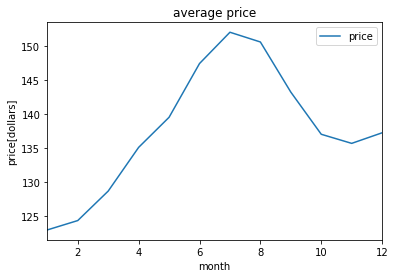

In [128]:
# create a figure of average rent price per a night in month.
df_available_month.plot(y = 'price')
plt.xlabel('month')
plt.ylabel('price[dollars]')
plt.title('average price')

### Question2. Which reviews is the more/less important for the total satisfaction?

Text(0.5, 1, 'correlations')

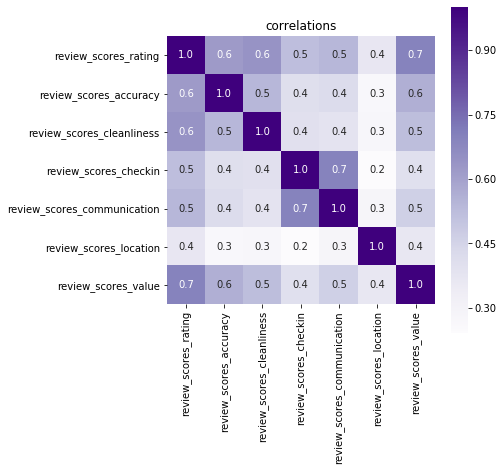

In [129]:
fig, ax = plt.subplots(figsize=(6, 6))
sb.heatmap(df_rating.corr(), annot=True, cmap='Purples', fmt="1.1f", square = True)
ax.set_ylim(7, 0)
plt.title('correlations')

### Question3. Which cancellation policy you might choose if you are a host?

In [130]:
def boxplot_cancel(data):
    """
    Description: This function can be used to read the file in the filepath (data/log_data)
    to get the user and time info and used to populate the users and time dim tables.

    Arguments:
        cur: the cursor object. 
        filepath: log data file path. 

    Returns:
        None
    """
    plt.figure(figsize=(5, 5))
    ax = sb.boxplot(x=df_cancel["cancellation_policy"], 
                    y = data, 
                    order=['flexible', 'moderate', 'strict'])

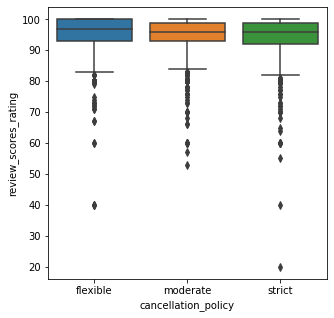

In [131]:
boxplot_cancel(df_cancel["review_scores_rating"])

Text(0, 0.5, 'price[dollars]')

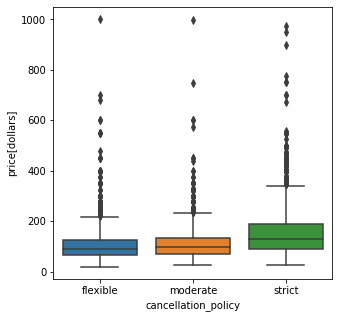

In [132]:
boxplot_cancel(df_cancel["price"])
plt.ylabel('price[dollars]')

## 5. Results evaluation

Question1. Which season is the price become higher than other seasons?
* Summer (especially July and August) is the higher than others.

Question2. Which reviews is the more/less important for the total satisfaction?
* Value is the most correlated to the total satisfaction. 
* Place is the least correlated to the total satisfaction.

Question3. Which cancellation policy you might choose if you are a host?    
  Of course it's depend on the owner's policy, but the following facts may help to consider: 
* The rooms with flexible cancellation policy tend to be higher satisfaction.
* The rooms with higher price tend to have a strict cancellation policy.

## References
https://www.airbnb.jp/  
https://www.digitaltrends.com/home/what-is-airbnb/  
https://en.wikipedia.org/wiki/Airbnb  